In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("movies_metadata.csv")
sample_df = pd.read_csv("movies_metadata.csv")

Different Columns:

adult	
belongs_to_collection	
budget	
genres	
homepage	
id	
imdb_id	
original_language	
original_title	
overview	
popularity	
poster_path	
production_companies	
production_countries	
release_date	
revenue	
runtime	
spoken_languages	
status	
tagline	
title	
video	
vote_average	
vote_count


# **Initial Cleanup**

Replaced every nan value with a string form of a list for production_countries to be processed by literal_eval later.

Initially genre is in the format of [{'id': 10194, 'name': 'Toy Story Collection'...}]

Needed to clean up, in a list format to be used later. 

The same can be said for production countries.

In [ ]:
df['production_countries'] = df['production_countries'].fillna('[]')
df['spoken_languages'] = df['spoken_languages'].fillna('[]')

In [ ]:
from ast import literal_eval

features = ['production_countries','genres','spoken_languages']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [ ]:
def return_list(series): 
  if type(series) != list:
    return []
  names = [i['name'] for i in series]
  return names

def return_string(series):
  if type(series) != str:
    return ""
  names = [i['name'] for i in series]
  return "".join(names)

**Sort by Genre**

In [ ]:
df['genres'] = df['genres'].apply(return_list)

In [ ]:
genre = df["genres"].value_counts()
print(genre)
#df.head(3)

[Drama]                                 5000
[Comedy]                                3621
[Documentary]                           2723
[]                                      2442
[Drama, Romance]                        1301
                                        ... 
[Science Fiction, Horror, Adventure]       1
[Thriller, Comedy, Crime, Adventure]       1
[Mystery, Thriller, Adventure]             1
[TV Movie, Drama, Romance, Family]         1
[History, Action, Adventure, War]          1
Name: genres, Length: 4066, dtype: int64


**Sort by Origin**

In [ ]:
df['production_countries'] = df['production_countries'].apply(return_list)

In [ ]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",[United States of America],10/30/1995,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",[United States of America],12/15/1995,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",[United States of America],12/22/1995,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92


In [ ]:
origin = df['production_countries'].value_counts()
print(origin)

[United States of America]                            17851
[]                                                     6282
[United Kingdom]                                       2238
[France]                                               1654
[Japan]                                                1356
                                                      ...  
[Germany, Poland, United Kingdom]                         1
[Indonesia, Germany, United States of America]            1
[Bosnia and Herzegovina, France, Italy, Slovenia]         1
[Ireland, Germany]                                        1
[Bosnia and Herzegovina, Serbia, Croatia, Hungary]        1
Name: production_countries, Length: 2391, dtype: int64


**Sort by language**

In [ ]:
df['spoken_languages'] = df['spoken_languages'].apply(return_list)

In [ ]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",[United States of America],10/30/1995,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",[United States of America],12/15/1995,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",[United States of America],12/22/1995,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92


In [ ]:
languages = df['spoken_languages'].value_counts()
print(languages)

[English]                                     22397
[]                                             3829
[Français]                                     1853
[日本語]                                          1290
[Italiano]                                     1218
                                              ...  
[suomi, 日本語, English]                             1
[普通话, English, Pусский]                           1
[فارسی, Español]                                  1
[English, 日本語, Français, العربية, Español]        1
[English, Srpski, Türkçe]                         1
Name: spoken_languages, Length: 1843, dtype: int64


# **Classifying the data**

Our goal right now is to plot the revenue as the y-coordinate, the year it was created in as the x-coordinate, and each dot will be colored based on the country.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['revenue'] = df['revenue'].fillna('0')
df['revenue'] = df['revenue'].astype(float) 
df['budget'] = df['budget'].astype(float) 
df['budget'] = df['budget'].fillna('0')

In [ ]:
df['result'] = df['revenue']/df['budget']

In [ ]:
print(df['result'].value_counts())

0.000000    3509
inf         2027
1.000000      20
2.000000      12
4.000000      11
            ... 
2.076607       1
1.431323       1
0.009587       1
0.550348       1
2.454926       1
Name: result, Length: 5233, dtype: int64


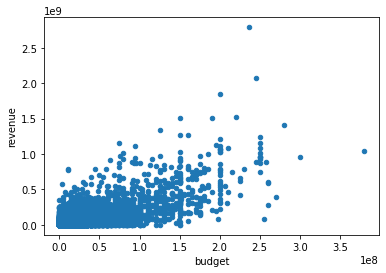

In [ ]:
df.plot(kind = 'scatter', y = 'revenue', x= 'budget')


In [ ]:
plt.gcf().set_size_inches((20, 20))    
plt.show()

<Figure size 1440x1440 with 0 Axes>

**Creating Linear Regression Models Based on Genre**

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
all_genres = set(itertools.chain.from_iterable(df['genres']))
print(len(all_genres))

20


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
print(type(df['genres'][0]))
print(df['genres'][0])

<class 'list'>
['Animation', 'Comedy', 'Family']


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

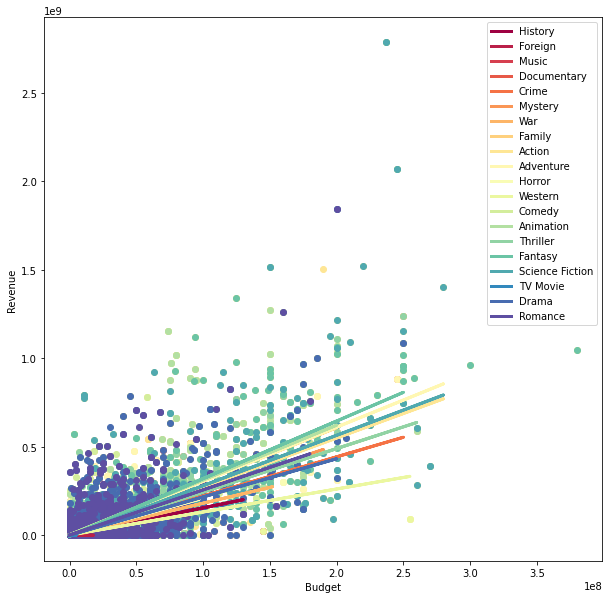

In [ ]:
index = 0

plt.figure(figsize=(10,10))
colors = plt.cm.Spectral(np.linspace(0,1,20))
for genre in all_genres:
  all_action = df[df['genres'].apply(lambda x : genre in x)]
  x = np.array(all_action['budget']).reshape(-1,1)
  y = np.array(all_action['revenue'])
  train_x, test_x = x[:len(all_action)//2], x[len(all_action)//2:]
  train_y, test_y = y[:len(all_action)//2], y[len(all_action)//2:]
  model = LinearRegression()
  model.fit(train_x,train_y)
  pred = model.predict(test_x)
  plt.scatter(x,y, c = colors[index])
  plt.plot(test_x, pred,color = colors[index],linewidth = 3, label = genre)
  index+=1

plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.legend(loc = "upper right")
plt.show()

In [ ]:
r_sq = action_model.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', action_model.intercept_)
print('slope:', action_model.coef_)

coefficient of determination: 0.42862427302190564
intercept: -4241249.918195583
slope: [2.95183401]
